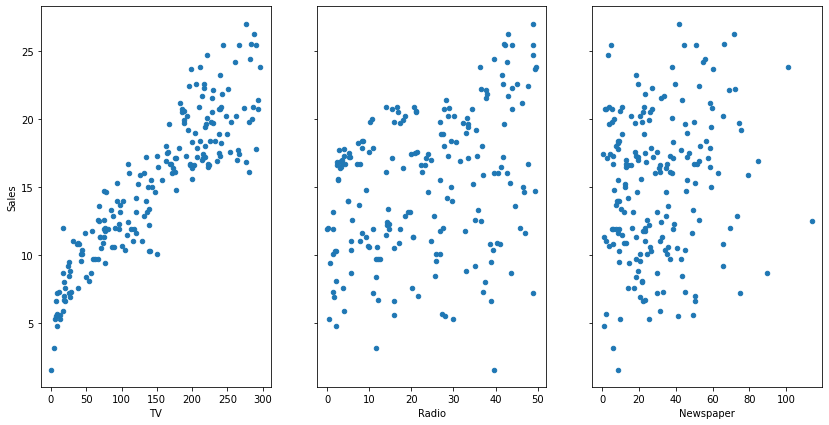

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 



#reading data from the files
data = pd.read_csv("/content/advertising.csv")
data.head()


# visulaization
fig, axs = plt.subplots(1,3,sharey =True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(14,7))

data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])

data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [5]:
#creating x & y for linear regression
feature_cols = ['TV']
x = data[feature_cols]
y = data.Sales

In [7]:
#importing linaer regression algorithm for simple linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(lr.intercept_)


6.974821488229891


In [9]:
print(lr.coef_)

[0.05546477]


In [14]:
result=  6.974821488229891 + 0.05546477*50
result

9.74805998822989

In [17]:
x_new = pd.DataFrame({'TV':[data.TV.min(), data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [19]:
preds = lr.predict(x_new)
preds

array([ 7.01364683, 23.41457946])

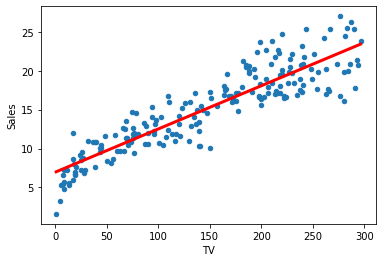

In [22]:
data.plot(kind= 'scatter', x='TV', y='Sales')

plt.plot(x_new,preds, c='red', linewidth=3)

In [29]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data = data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [30]:
#finding the probability values
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [31]:
#finding the r-squared values
lm.rsquared

0.8121757029987414

In [32]:
#multilinear regression
feature_cols = ['TV','Radio','Newspaper']
x = data[feature_cols]
y = data.Sales

In [33]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(lr.intercept_)
print(lr.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [35]:
lm = smf.ols(formula='Sales ~ TV+Radio+Newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           8.13e-99
Time:                        15:23:20   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
lm = smf.ols(formula='Sales ~ TV+Radio',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Wed, 09 Sep 2020   Prob (F-statistic):          2.39e-100
Time:                        15:26:26   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""